**Datasets:**


*   [VTON-1](https://www.kaggle.com/code/ma00753045/tryon/notebook)
*   [VTON-2](https://www.kaggle.com/datasets/rkuo2000/viton-dataset)

*   [CIHP and ATR](https://drive.google.com/uc?id=1B9A9UCJYMwTL4oBEo4RZfbMZMaZhKJaz)

*   [LIP](https://drive.google.com/drive/folders/1ZjNrTb7T_SsOdck76qDcd5OHkFEU0C6Q)

*   [ATR, CIHP and LIP](https://drive.google.com/drive/folders/0BzvH3bSnp3E9ZW9paE9kdkJtM3M?resourcekey=0-vgKJX42GVFaAwjhEWAncjQ)

*   [MHP V2](https://drive.google.com/file/d/1YVBGMru0dlwB8zu1OoErOazZoc8ISSJn/view)


**Papers:**

*   [Base Paper on Virtual Try-On](https://www.arxiv-vanity.com/papers/1909.02165/)
*   [Blog on Virtual Try-On (for additional info)](https://www.kdnuggets.com/2020/10/deep-learning-virtual-try-clothes.html)

*   [Multi-Human Parsing on MHP v2.0](https://paperswithcode.com/sota/multi-human-parsing-on-mhp-v20)

**Tutorials:**

* [Live Implementation 1](https://www.youtube.com/watch?v=csYkGeJ5bCM&list=WL&index=7&ab_channel=BrainMentorsPvtLtd)
* [Live Implementation 2](https://www.youtube.com/watch?v=YjWh7QvVH60&ab_channel=TheAIGuy)

* [Human Body Parsing](https://www.youtube.com/watch?v=ng_gAxQnXAY&ab_channel=IdiotDeveloper)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import os, sys
import json
from os import listdir
from os.path import isfile, join
import shutil 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2

from random import randrange

import scipy.io

In [2]:
tf.random.set_seed(42)
np.random.seed(42)

In [3]:
is_download_vton_dataset = True
is_download_cihp_dataset = True

In [4]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [5]:
%%time
# Train Directory

if is_download_vton_dataset:

  !wget https://drive.google.com/file/d/1lHNujZIq6KVeGOOdwnOXVCSR5E7Kv6xv/view
  !gdown 1lHNujZIq6KVeGOOdwnOXVCSR5E7Kv6xv

  !unzip -q /content/ACGPN_traindata.zip -d Train_Dir

  shutil.move('/content/Train_Dir', '/content/VTON/Train_Dir')

--2022-12-27 15:33:07--  https://drive.google.com/file/d/1lHNujZIq6KVeGOOdwnOXVCSR5E7Kv6xv/view
Resolving drive.google.com (drive.google.com)... 64.233.189.100, 64.233.189.139, 64.233.189.113, ...
Connecting to drive.google.com (drive.google.com)|64.233.189.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view’

view                    [ <=>                ]  72.30K  --.-KB/s    in 0.02s   

2022-12-27 15:33:08 (3.85 MB/s) - ‘view’ saved [74033]

Downloading...
From: https://drive.google.com/uc?id=1lHNujZIq6KVeGOOdwnOXVCSR5E7Kv6xv
To: /content/ACGPN_traindata.zip
100% 511M/511M [00:03<00:00, 128MB/s] 
CPU times: user 6.65 s, sys: 14 s, total: 20.6 s
Wall time: 51 s


In [6]:
%%time
# Test Directory

if is_download_vton_dataset:

  !wget https://drive.google.com/file/d/1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR/view
  !gdown 1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR

  !unzip -q /content/Data_preprocessing.zip -d Test_Dir

  # move directories downloaded as unziped for vton dataset into a single vton directory
  shutil.move('/content/Test_Dir', '/content/VTON/Test_Dir')

--2022-12-27 15:33:58--  https://drive.google.com/file/d/1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR/view
Resolving drive.google.com (drive.google.com)... 64.233.189.139, 64.233.189.113, 64.233.189.101, ...
Connecting to drive.google.com (drive.google.com)|64.233.189.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view.1’

view.1                  [ <=>                ]  72.31K  --.-KB/s    in 0.02s   

2022-12-27 15:33:59 (3.84 MB/s) - ‘view.1’ saved [74041]

Downloading...
From: https://drive.google.com/uc?id=1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR
To: /content/Data_preprocessing.zip
100% 143M/143M [00:03<00:00, 39.1MB/s]
CPU times: user 113 ms, sys: 46.1 ms, total: 159 ms
Wall time: 10.9 s


In [7]:
vton_test_dir = '/content/VTON/Test_Dir'
vton_train_dir = '/content/VTON/Train_Dir'

In [8]:
def get_dir_and_files(root_dir):

  """
  get number of files in a directory and all its subdirectories
  """
  
  if os.path.exists(root_dir):

    dir_n_files = pd.DataFrame({'Directoy Path':[], 'Sub Directories':[], 'Number of Files':[]})

    for dir_path, dirs, files in os.walk(root_dir):
      dir_n_files = dir_n_files.append({'Directoy Path':dir_path, 'Sub Directories':dirs, 'Number of Files':len(files)}, ignore_index=True)

    dir_n_files['Number of Files'] = dir_n_files['Number of Files'].astype(int)

    return dir_n_files
  
  else:
    print('No such directory found: ', root_dir)

In [9]:
def get_file_paths_at_index(root_dir, index=0):

  """
  get a list of datapoints at an index from each sub directory
  """
  
  if os.path.exists(root_dir):

    result_files = []
    for root, dirs, files in os.walk(root_dir):
        if files and len(files) > index:
            result_files.append(os.path.join(root, sorted(files)[index]))

    return sorted(result_files)

  else:
    print('No such directory found: ', root_dir)

In [10]:
def swapPositions(list, pos1, pos2):

  """
  Python3 program to swap elements
  at given positions
  """
     
  # popping both the elements from list
  first_ele = list.pop(pos1)  
  second_ele = list.pop(pos2-1)
  
  # inserting in each others positions
  list.insert(pos1, second_ele) 
  list.insert(pos2, first_ele) 
   
  return list

In [11]:
def get_pose_keypoints(file_path):

  """
  Read pose file in VTON dataset for a given image
  """

  if os.path.exists(file_path):
    # Opening JSON file
    with open(file_path) as json_file:
        data = json.load(json_file)

        return data['people'][0]['pose_keypoints']

  else:
    print('No such directory found: ', file_path)

In [12]:
def visualize_vton_dataset_imgs(root_dir, max_range, n_samples=3, figsize=(20, 12)):

  """
  Visualized images at random rows in a proper order and also plots keypoints on human image
  """

  if os.path.exists(root_dir):
 
    # create figure
    fig = plt.figure(figsize=figsize)
  
    # setting values to rows and column variables
    rows = n_samples
    columns = len(list(os.walk(root_dir))[0][1])

    index = 0

    for row_num in range(rows):

      random_index = randrange(max_range)
    
      visualize_paths = get_file_paths_at_index(root_dir, random_index)

      pose_keypoints_path  = visualize_paths[-1]

      # removed pose column, bcz it needs image processing
      visualize_paths = visualize_paths[:-1]

      # swapped position of some columns to display images in better order
      visualize_paths = swapPositions(visualize_paths, 1, 4)
      visualize_paths = swapPositions(visualize_paths, 1, 2)
      visualize_paths = swapPositions(visualize_paths, 2, 3)
  
      img_read_array = []
    
      # create a dictionary containing read image data and image info
      for img_path in visualize_paths:
      
        # img_test = cv2.imread(img_path)
        img = {'img': mpimg.imread(img_path), 'img_name': img_path.split("/")[4], 'file_name': img_path.split("/")[5]}
        img_read_array.append(img)



      # display dictionary of images on a grid
      for img_read_data in img_read_array:

        index += 1

        fig.add_subplot(rows, columns, index,)

        # styling
        plt.rc('font', size=15) 
        # plt.rc('title', size=12)

        plt.imshow(img_read_data['img'])
        plt.title(img_read_data['file_name'], fontdict={'fontsize': 14})

        # remove axes on individual images
        plt.xticks([])
        plt.yticks([])

      
        if index%columns == 1:
          plt.ylabel(str(random_index))

        if row_num == rows-1:
          plt.xlabel(img_read_data['img_name'])


      # handle keypoints here and add img to img_read_array
      index += 1
      fig.add_subplot(rows, columns, index,)
    
      pose_keypoints_array = np.array(get_pose_keypoints(pose_keypoints_path)).reshape(-1, 3)

      pose_keypoints_img = img_read_array[2]['img']
      plt.imshow(pose_keypoints_img)

      # remove axes on individual images
      plt.xticks([])
      plt.yticks([])

      if row_num == rows-1:
          plt.xlabel(pose_keypoints_path.split("/")[3])
    
      i=0
      for x,y,z in pose_keypoints_array: 
          plt.plot(x, y, 'w.') # 'w.': color='white', marker='.'
          plt.text(x, y, str(i), color='r', fontsize=10)
          i+=1

  else:
    print('No such directory found: ', root_dir)

In [13]:
# Check number of files and directories in test directory 
get_dir_and_files(vton_test_dir)

,Directoy Path,Sub Directories,Number of Files
0,/content/VTON/Test_Dir,"[test_edge, test_pose, test_mask, test_color, ...",0
1,/content/VTON/Test_Dir/test_edge,[],2032
2,/content/VTON/Test_Dir/test_pose,[],2032
3,/content/VTON/Test_Dir/test_mask,[],12000
4,/content/VTON/Test_Dir/test_color,[],2032
5,/content/VTON/Test_Dir/test_img,[],2032
6,/content/VTON/Test_Dir/test_label,[],2032
7,/content/VTON/Test_Dir/test_colormask,[],10000


In [14]:
# Check number of files and directories in train directory 
get_dir_and_files(vton_train_dir)

,Directoy Path,Sub Directories,Number of Files
0,/content/VTON/Train_Dir,"[train_pose, train_colormask, train_img, train...",0
1,/content/VTON/Train_Dir/train_pose,[],14221
2,/content/VTON/Train_Dir/train_colormask,[],50000
3,/content/VTON/Train_Dir/train_img,[],14221
4,/content/VTON/Train_Dir/train_mask,[],12000
5,/content/VTON/Train_Dir/train_edge,[],14221
6,/content/VTON/Train_Dir/train_label,[],14221
7,/content/VTON/Train_Dir/train_color,[],14221


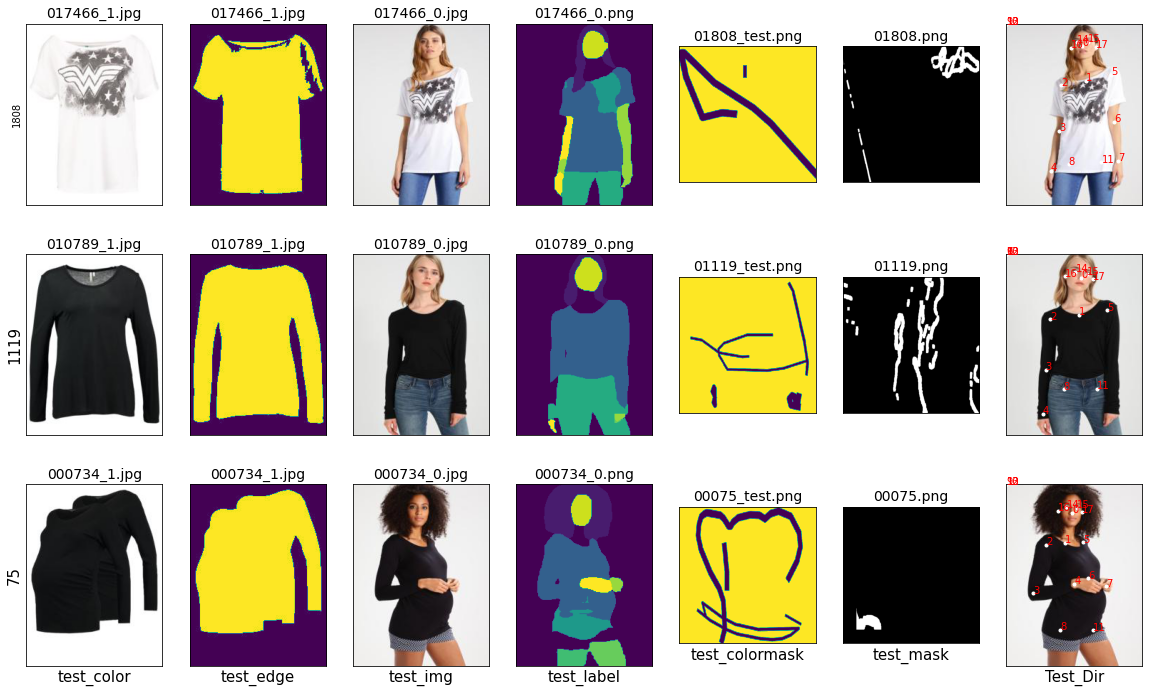

In [15]:
visualize_vton_dataset_imgs(vton_test_dir, 2032, 3, (20, 12))

In [16]:
def move_all_files_and_sub_dirs(source, destination):

  """
  Moves all files and sub-directories at root level of a directory to another place 
  along with all there contents
  """

  root_dir = list(os.walk(source))[0][0]
  sub_dir_and_files = [os.path.join(root_dir, i) for i in (list(os.walk(source))[0][1] + list(os.walk(source))[0][2])]

  for item in sub_dir_and_files:

    shutil.move(item, destination)

In [17]:
%%time
if is_download_cihp_dataset:

  !pip install --upgrade --no-cache-dir gdown

  !wget https://drive.google.com/uc?id=1B9A9UCJYMwTL4oBEo4RZfbMZMaZhKJaz
  !gdown 1B9A9UCJYMwTL4oBEo4RZfbMZMaZhKJaz

  !unzip -q /content/instance-level-human-parsing.zip -d CIHP

  # Remove ATR dataset as we do not need it
  shutil.rmtree('/content/CIHP/ICCV15_fashion_dataset(ATR)')

  # Move CIHP dataset folders from tree of sub-dirs to dir "/content/CIHP"
  move_all_files_and_sub_dirs('/content/CIHP/instance-level_human_parsing/instance-level_human_parsing', '/content/CIHP')

  # Remove empty directories from dataset
  shutil.rmtree('/content/CIHP/instance-level_human_parsing') 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-12-27 15:34:22--  https://drive.google.com/uc?id=1B9A9UCJYMwTL4oBEo4RZfbMZMaZhKJaz
Resolving drive.google.com (drive.google.com)... 64.233.189.139, 64.233.189.113, 64.233.189.101, ...
Connecting to drive.google.com (drive.google.com)|64.233.189.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘uc?id=1B9A9UCJYMwTL4oBEo4RZfbMZMaZhKJaz’

uc?id=1B9A9UCJYMwTL     [ <=>                ]   2.22K  --.-KB/s    in 0s      

2022-12-27 15:34:23 (27.0 MB/s) - ‘uc?id=1B9A9UCJYMwTL4oBEo4RZfbMZMaZhKJaz’ saved [2275]

Downloading...
From: https://drive.google.com/uc?id=1B9A9UCJYMwTL4oBEo4RZfbMZMaZhKJaz
To: /content/instance-level-human-parsing.zip
100% 2.91G/2.91G [00:30<00:00, 94.4MB/s]
CPU times: user 1.93 s, sys: 1.63 s, total: 3.57 s
Wall time: 1min 36s


In [18]:
cihp_test_dir = '/content/CIHP/Testing'
cihp_train_dir = '/content/CIHP/Training'
cihp_valid_dir = '/content/CIHP/Validation'

In [19]:
def visualize_cihp_dataset_imgs(root_dir, n_samples=3, figsize=(20, 12)):
 
  if os.path.exists(root_dir):

    # create figure
    fig = plt.figure(figsize=figsize)

    # setting values to rows and column variables
    rows = n_samples
    columns = len(list(os.walk(root_dir))[0][1])
    max_range = len(os.listdir(os.path.join(root_dir, list(os.walk(root_dir))[0][1][0]))) - 1

    index = 0

    for row_num in range(rows):

      random_index = randrange(max_range)

      visualize_paths = get_file_paths_at_index(root_dir, random_index)

      img_read_array = []

      # create a dictionary containing read image data and image info
      for img_path in visualize_paths:

        # img_test = cv2.imread(img_path)
        img = {'img': mpimg.imread(img_path), 'img_name': img_path.split("/")[4], 'file_name': img_path.split("/")[5]}
        img_read_array.append(img)



      # display dictionary of images on a grid
      for img_read_data in img_read_array:

        index += 1

        fig.add_subplot(rows, columns, index,)

        # styling
        plt.rc('font', size=15) 
        # plt.rc('title', size=12)

        plt.imshow(img_read_data['img'])
        plt.title(img_read_data['file_name'], fontdict={'fontsize': 14})

        # remove axes on individual images
        plt.xticks([])
        plt.yticks([])


        if index%columns == 1:
          plt.ylabel(str(random_index))

        if row_num == rows-1:
          plt.xlabel(img_read_data['img_name'])

  else:
    print('No such directory found: ', root_dir)



In [20]:
# Check number of files and directories in test directory 

get_dir_and_files(cihp_test_dir)

,Directoy Path,Sub Directories,Number of Files
0,/content/CIHP/Testing,[Images],1
1,/content/CIHP/Testing/Images,[],5000


In [21]:
# Check number of files and directories in train directory 

get_dir_and_files(cihp_train_dir)

,Directoy Path,Sub Directories,Number of Files
0,/content/CIHP/Training,"[Instances, Human_ids, Instance_ids, Human, Ca...",1
1,/content/CIHP/Training/Instances,[],28280
2,/content/CIHP/Training/Human_ids,[],28280
3,/content/CIHP/Training/Instance_ids,[],28280
4,/content/CIHP/Training/Human,[],28280
5,/content/CIHP/Training/Categories,[],28280
6,/content/CIHP/Training/Images,[],28280
7,/content/CIHP/Training/Category_ids,[],28280


In [22]:
# Check number of files and directories in validation directory 

get_dir_and_files(cihp_valid_dir)

,Directoy Path,Sub Directories,Number of Files
0,/content/CIHP/Validation,"[Instances, Human_ids, Instance_ids, Human, Ca...",1
1,/content/CIHP/Validation/Instances,[],5000
2,/content/CIHP/Validation/Human_ids,[],5000
3,/content/CIHP/Validation/Instance_ids,[],5000
4,/content/CIHP/Validation/Human,[],5000
5,/content/CIHP/Validation/Categories,[],5000
6,/content/CIHP/Validation/Images,[],5000
7,/content/CIHP/Validation/Category_ids,[],5000


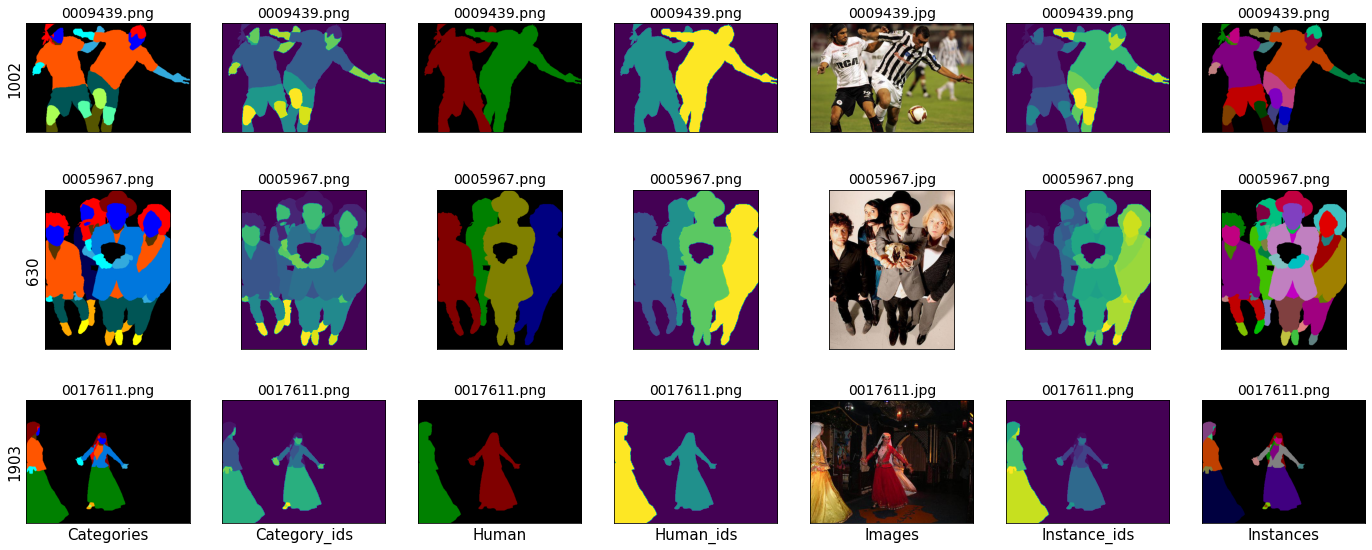

In [23]:
visualize_cihp_dataset_imgs(cihp_valid_dir, n_samples=3, figsize=(24,10))

**CIHP Dataset Explained**

**Images:**



1.   **Category_ids:** Semantic part segmentation labels. Normalized grey scale masks for objects with pixel values from 0-19, as there are total 20 classes.

2.   **Categories:** Visualized semantic part segmentation labels. Non-normalized RGB masks for objects.

3.   **Human_ids:** Semantic person segmentation labels. Normalized grey scale masks for humans. Every image contains grey scale values equal to number of humans.

4.   **Human:** Visualized semantic person segmentation labels. Non-normalized RGB masks for humans.

5.   **Instance_ids:** Instance-level human parsing labels. Same body parts of different humans in the image will have different masks, so total number of colors will be (no. of humans x no. of class of objects). WE WILL NOT USE THIS DATA FOR OUR PROBLEM.  

6.   **Instances:** Visualized instance-level human parsing labels. Same as Instance_ids, but have non-normalized RGB images. WE WILL NOT USE THIS DATA FOR OUR PROBLEM. 

7.   **Images:** The input image data.

**Label order of semantic part segmentation:**

1.  Background
2.  Hat 
3.  Hair 
4.  Glove 
5.  Sunglasses 
6.  UpperClothes 
7.  Dress 
8.  Coat 
9.  Socks 
10.  Pants 
11. Torso-skin 
12. Scarf 
13. Skirt 
14. Face 
15. Left-arm 
16. Right-arm 
17. Left-leg 
18. Right-leg 
19. Left-shoe 
20. Right-shoe